In [17]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/df_one_hot_encoded_normalized.csv")
train_data = df[(df['Target']== '0') | (df['Target']== '1')] # Training data (rows labeled 0 and 1)

X = train_data.drop(columns=['Target'])
y = train_data['Target'].astype(int)

print("Training data shape:", X.shape)

Training data shape: (3630, 252)


In [18]:
import pandas as pd
print(y_test.dtypes)


object


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[398  51]
 [ 88 189]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       449
           1       0.79      0.68      0.73       277

    accuracy                           0.81       726
   macro avg       0.80      0.78      0.79       726
weighted avg       0.81      0.81      0.81       726


Accuracy: 0.8085399449035813


In [20]:
coefficients = logistic_model.coef_[0]
feature_names = X.columns

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

coef_df['AbsCoefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='AbsCoefficient', ascending=False)

print(coef_df)


                                 Feature  Coefficient  AbsCoefficient
1         Previous qualification (grade)     6.369539        6.369539
14      Curricular units 2nd sem (grade)    -4.835104        4.835104
2                        Admission grade     4.250768        4.250768
8       Curricular units 1st sem (grade)    -3.241842        3.241842
13   Curricular units 2nd sem (approved)    -3.120617        3.120617
..                                   ...          ...             ...
224              Father's occupation_121     0.000000        0.000000
220              Father's occupation_102     0.000000        0.000000
168             Previous qualification_5     0.000000        0.000000
195                       Nacionality_32     0.000000        0.000000
230              Father's occupation_134     0.000000        0.000000

[252 rows x 3 columns]


In [21]:
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt

y_prob = logistic_model.predict_proba(X_test)[:, 1]
print(y_test.values, y_prob)


[0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1
 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1
 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0
 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1
 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0
 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0
 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1
 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0
 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 1 

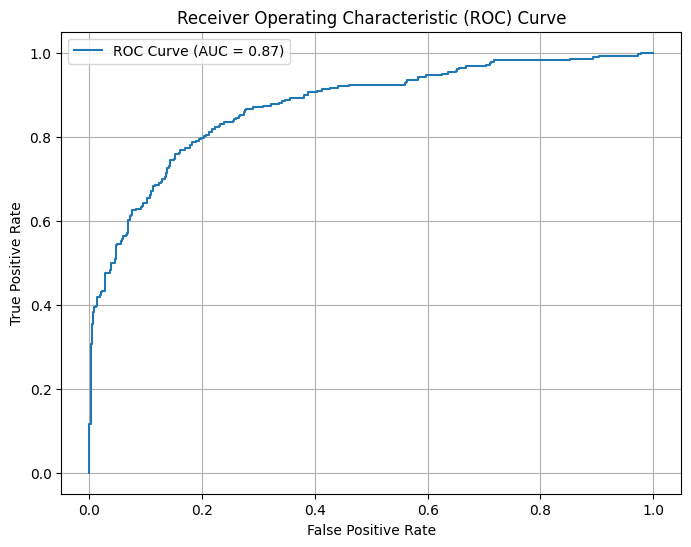

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()
